# Google Gemini 2.5 for Data Analysis using CSV files and Code Execution

This notebook demonstrates how to leverage the Google Gemini 2.5 model with its code execution capabilities for data analysis tasks directly on CSV files. Similar to the concept of the [Data Science Agent in Colab](https://developers.googleblog.com/en/data-science-agent-in-colab-with-gemini/), Gemini can understand natural language prompts, generate and execute Python code for data loading, transformation, analysis, and visualization, streamlining data analysis workflows.

This example focuses on using the Gemini API with the `code_execution` tool to interact with a CSV file based on defined tasks. Learn more about it:
- code_execution tool: https://ai.google.dev/gemini-api/docs/code-execution?lang=python
- Data Science Agent in Colab: [https://developers.googleblog.com/en/data-science-agent-in-colab-with-gemini/](https://developers.googleblog.com/en/data-science-agent-in-colab-with-gemini/)
- file upload: https://ai.google.dev/gemini-api/docs/image-understanding#upload-image

The notebooks includes 3 examples for:
- Data Manipulation & Calculation: Calculate the total value of each transaction, accounting for commissions.
- Calculation & Aggregation: Determine overall cash flow and total costs from trading activities.
- Data Visualization: Visualize the trading volume (shares bought vs. sold) for each stock

In [ ]:
%pip install google-genai pandas 

In [1]:
from google import genai

# create client
client = genai.Client()

# path to the file to upload
csv_file_path = "../assets/portfolio_transactions.csv" # Repalce with your own file path

# Upload the file to the File API
file = client.files.upload(file=csv_file_path)

## Data Manipulation & Calculation:

Goal: Calculate the total value of each transaction, accounting for commissions.

In [2]:
prompt =  """Add a 'TotalValue' column. For 'BUY' actions, calculate it as (Quantity * PricePerShare) + Commission. For 'SELL' actions, calculate it as (Quantity * PricePerShare) - Commission. 
Return a helpful message and the return as a csv file."""

# Generate the response
response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents=[file, prompt],
    config={"tools": [{"code_execution": {}}]},
)

parse the response and the return the csv file (as part of `inline_data`)

In [3]:
import pandas as pd
from IPython.display import Markdown

output_file = "response.csv"

for part in response.candidates[0].content.parts:
    if part.text:
        display(Markdown(part.text))
    if part.inline_data:
        with open(output_file, "wb") as f:
            f.write(part.inline_data.data)
        display(Markdown(f"CSV file saved to {output_file}"))
        display(Markdown(f"Preview of the first few rows of the CSV file:"))
        display(pd.read_csv(output_file).head())
        

CSV file saved to response.csv

Preview of the first few rows of the CSV file:

,TransactionID,Date,Ticker,Action,Quantity,PricePerShare,Commission,TotalValue
0,1,2023-01-15,GOOG,BUY,10,95.50,5.0,960.00
1,2,2023-02-10,AAPL,BUY,20,150.25,5.0,3010.00
2,3,2023-03-05,MSFT,BUY,15,280.75,5.0,4216.25
3,4,2023-04-20,GOOG,SELL,5,105.00,5.0,520.00
4,5,2023-05-12,TSLA,BUY,8,180.00,5.0,1445.00


I have successfully added the 'TotalValue' column to your transaction data.
For 'BUY' actions, 'TotalValue' is calculated as (Quantity * PricePerShare) + Commission.
For 'SELL' actions, 'TotalValue' is calculated as (Quantity * PricePerShare) - Commission.

The updated data, including the new 'TotalValue' column, has been saved to a CSV file named `transactions_with_total_value.csv`.


## Calculation & Aggregation:

Goal: Determine overall cash flow and total costs from trading activities.

In [4]:
from IPython.display import Markdown

prompt =  """Calculate the total amount spent on 'BUY' transactions and the total amount received from 'SELL' transactions based on the 'TotalValue' column. Also, calculate the net cash flow (Total Received - Total Spent) and the total commission paid across all transactions. 
Return a helpful message and markdown table with the results."""

# Generate the response
response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents=[file, prompt],
    config={"tools": [{"code_execution": {}}]},
)

display(Markdown(response.text))


The financial analysis of your transactions is complete.

Here is a summary of the key metrics:

| Metric                             | Amount ($)   |
|:-----------------------------------|:-------------|
| Total Spent (BUY transactions)     | 31498.5      |
| Total Received (SELL transactions) | 15800.4      |
| Net Cash Flow (Received - Spent)   | -15698.1     |
| Total Commission Paid              | 130          |

## Data Visualization

Goal: Visualize the trading volume (shares bought vs. sold) for each stock.

In [5]:
prompt =  """Create a bar chart showing the total quantity of shares bought and sold for each stock ticker (AAPL, GOOG, MSFT, TSLA, NVDA). Use different colors for BUY and SELL actions. 
Return a helpful message and generate a matplotlib plot chart and save the plot as an image file"""

# Generate the response
response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents=[file, prompt],
    config={"tools": [{"code_execution": {}}]},
)

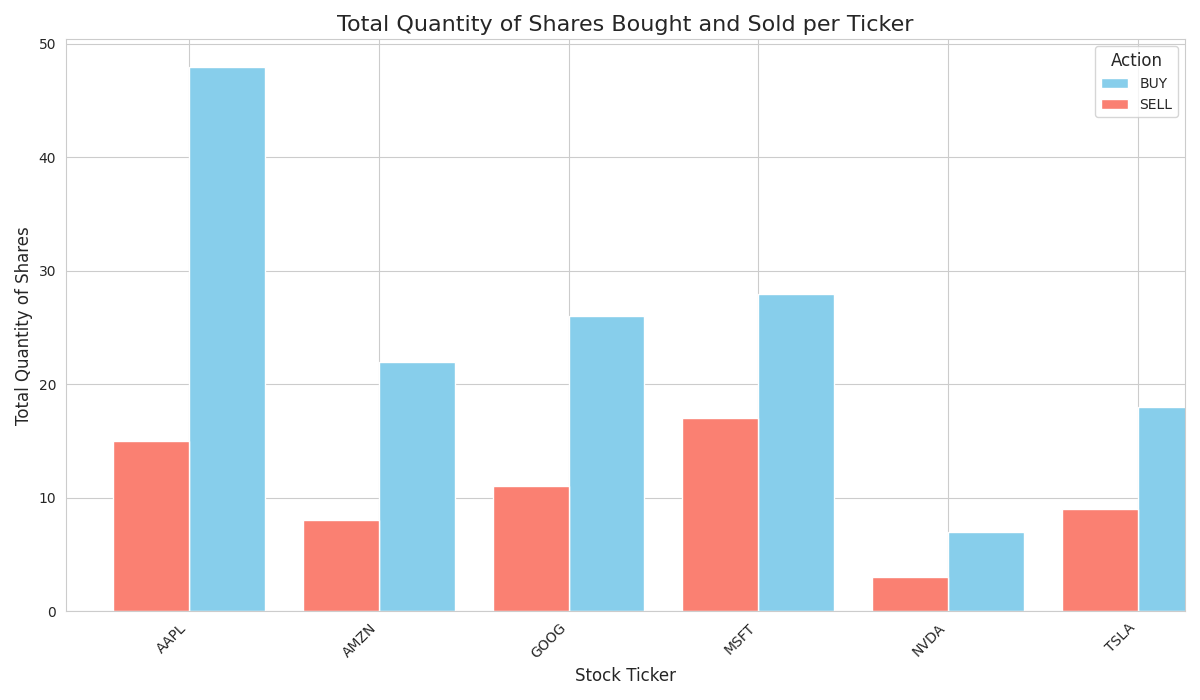

I have successfully generated a bar chart showing the total quantity of shares bought and sold for each of the specified stock tickers (AAPL, AMZN, GOOG, MSFT, NVDA, TSLA). The 'BUY' quantities are represented in skyblue, and 'SELL' quantities are in salmon for clear differentiation.

The chart, titled "Total Quantity of Shares Bought and Sold per Ticker," has been saved as `stock_transactions_quantity_barchart.png`. This visualization allows for a quick comparison of buying and selling activity across different stocks.

In [6]:
from IPython.display import Image, Markdown

# Print the results and display the plot
for part in response.candidates[0].content.parts:
    if part.text:
        display(Markdown(part.text))
    if part.inline_data:
        display(Image(data=part.inline_data.data, width=800, format="png"))